### IMINUIT Stuff
Ref: https://indico.cern.ch/event/833895/contributions/3577808/attachments/1927550/3191336/iminuit_intro.html


### Simple Fit: line model to scattered (𝑥,𝑦) data
* Line model has two parameters (𝑎,𝑏)

In [2]:
# basic setup of the notebook

# !pip install iminuit matplotlib numpy
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams["font.size"] = 20
import numpy as np

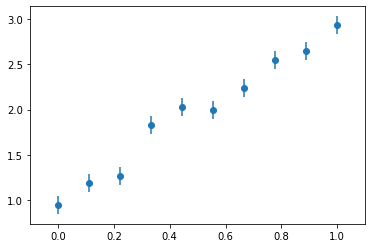

In [3]:
# let's make a line model
def line(x, a, b):
    return a + x * b

a_true = 1.0
b_true = 2.0

# let's make some data
x = np.linspace(0, 1, 10)

# precomputed random numbers from standard normal distribution
z = np.array([-0.49783783, -0.33041722, -1.71800806,  1.60229399,
                 1.36682387, -1.15424221, -0.91425267, -0.03395604,
                 -1.27611719, -0.7004073 ])

sigma_y = 0.1 * np.ones_like(x) #kp: 10% of values as errors?
y = line(x, a_true, b_true) + sigma_y * z

plt.errorbar(x, y, sigma_y, fmt="o")
plt.xlim(-0.1, 1.1);


Want to estimate parameters (𝑎,𝑏)
of line model from data
Need score which is minimal when model best agrees with data

* Sum of residuals squared (least-squares method)
* Negated sum of log-likelihood values (maximum-likelihood method)

MINUIT always minimizes; negate score function to maximize
Use iminuit to numerically minimize score as function of model parameters

In [4]:
# least-squares score function = sum of data residuals squared
def LSQ(a, b):
    return np.sum((y - line(x, a, b)) ** 2 / sigma_y ** 2)

In [5]:
# everything in iminuit is done through the Minuit object, so we import it
from iminuit import Minuit

In [6]:
# create instance of Minuit and pass score function to minimize
m = Minuit(LSQ)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: InitialParamWarning: Parameter a does not have initial value. Assume 0.
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: InitialParamWarning: Parameter a is floating but does not have initial step size. Assume 1.
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: InitialParamWarning: Parameter b does not have initial value. Assume 0.
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: InitialParamWarning: Parameter b is floating but does not have initial step size. Assume 1.
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: InitialParamWarning: errordef is not given. Default to 1.
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: InitialParamWarning: Parameter a does not have initial value. Assume 0.
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: InitialParamWarning: Parameter a is floating but does not have initial step 



    iminuit shows a lot of warnings to make us aware of additional settings
    things may work without, but it is better to set things up properly

Initial parameter values

    MINUIT searches for local minimum by gradient-descent method from starting point
    If function has several minima, minimum found will depend on starting point
    If function has only one minimum, iminuit will converge to it faster if started near minimum
    If no starting value is provided, iminuit uses 0 (which may be bad)



In [7]:
# set start values via keywords for a and b
m = Minuit(LSQ, a=5, b=5)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: InitialParamWarning: Parameter a is floating but does not have initial step size. Assume 1.
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: InitialParamWarning: Parameter b is floating but does not have initial step size. Assume 1.
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: InitialParamWarning: errordef is not given. Default to 1.
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: InitialParamWarning: Parameter a is floating but does not have initial step size. Assume 1.
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: InitialParamWarning: Parameter b is floating but does not have initial step size. Assume 1.
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: InitialParamWarning: errordef is not given. Default to 1.
  




Notice how iminuit figured out that the arguments of LSQ are called "a" and "b". This is a cool gimmick of iminuit.
### Initial step sizes

    iminuit computes gradients numerically from finite differences over some step size
    step size should be
        small compared to the curvature of the function d2𝑓/d𝑎2, d2𝑓/d𝑏2

        large compared to numerical resolution (about 1e-14)

    iminuit very tolerant to step sizes and optimizes step size while it is running
    converge rate theoretically faster with optimal step size, but little impact in practice

In [8]:
# set step size with error_<name>=... keyword
m = Minuit(LSQ, a=5, b=5, error_a=0.1, error_b=0.1)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: InitialParamWarning: errordef is not given. Default to 1.
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: InitialParamWarning: errordef is not given. Default to 1.
  


### "Error definition"

    difficult to explain quickly (ask me and I will try), so just remember rule for 1 sigma uncertainties
        errordef=1 for least-squares score function
        errordef=0.5 for maximum-likelihood score function
    only changes uncertainty computation (no effect on minimization)



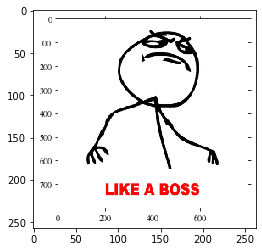

In [11]:
# set errordef=1 for least-squares score function
m = Minuit(LSQ, a=5, b=5, error_a=0.1, error_b=0.1, errordef=1)

# no more warnings! :-D

# fast alternative: just silence all warnings
m = Minuit(LSQ, pedantic=False)

import matplotlib.image as mpimg
img = mpimg.imread("images/trollface.png")
plt.imshow(img);

In [12]:
# check current parameter state (do this at any time)
m.get_param_states()


------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
------------------------------------------------------------------------------------------
| 0 | a    |    0.0    |    1.0    |            |            |         |         |       |
| 1 | b    |    0.0    |    1.0    |            |            |         |         |       |
------------------------------------------------------------------------------------------

### Parameters with limits

* Model parameters often have physical or mathematical limits, e.g. 𝑥≥0 in $\sqrt{x}$
* iminuit allows you to set a one-sided and two-sided limit for each parameter
* iminuit will never leave range bounded by limits
* slow convergence for parameters close to limit

In [13]:
# one-sided limit a > 0, two-sided limit 0 < b < 10
m = Minuit(LSQ, a=5, b=5,
           error_a=0.1, error_b=0.1,
           limit_a=(0, None), limit_b=(0, 10),
           errordef=1)

m.get_param_states()

------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
------------------------------------------------------------------------------------------
| 0 | a    |   5.00    |   0.10    |            |            |    0    |         |       |
| 1 | b    |   5.00    |   0.10    |            |            |    0    |   10    |       |
------------------------------------------------------------------------------------------

### (Initially) Fixing parameters

    for complex model with many parameters, may want to fix some parameters initially
    release fixed parameters when other parameters are close to optimal
    also useful for systematic checks



In [14]:
# fix parameter a
m = Minuit(LSQ, a=2, b=5, fix_a=True,
           error_a=0.1, error_b=0.1,
           errordef=1)

m.get_param_states()

------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
------------------------------------------------------------------------------------------
| 0 | a    |   2.00    |   0.10    |            |            |         |         |  yes  |
| 1 | b    |   5.00    |   0.10    |            |            |         |         |       |
------------------------------------------------------------------------------------------

### Now let's minimize that #$%@ function

In [15]:
# run migrad; will not vary a because we fixed it, only b
m.migrad()


------------------------------------------------------------------
| FCN = 305.1                   |      Ncalls=13 (13 total)      |
| EDM = 2.33E-16 (Goal: 0.0002) |            up = 1.0            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
------------------------------------------------------------------------------------------
| 0 | a    |   2.00    |   0.10    |            |            |         |         |  yes  |
| 1 | b    |   0.51    |   0.05    |            |            |         |         |       |
------------------------------------------------------------------------------------------

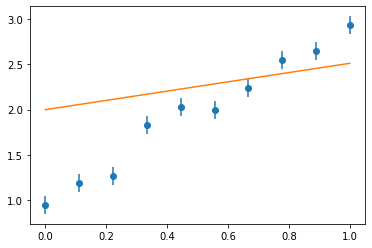

In [16]:
# get parameter values
a_fit = m.values["a"]  # m.values[0] also works
b_fit = m.values["b"]  # m.values[1] also works

plt.errorbar(x, y, sigma_y, fmt="o")
plt.plot(x, line(x, a_fit, b_fit));

In [17]:
# release fix on "a" and minimize again
m.fixed["a"] = False  # m.fixed[0] = False also works
m.migrad()


------------------------------------------------------------------
| FCN = 10.39                   |      Ncalls=29 (42 total)      |
| EDM = 2.06E-14 (Goal: 0.0002) |            up = 1.0            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
------------------------------------------------------------------------------------------
| 0 | a    |   0.99    |   0.06    |            |            |         |         |       |
| 1 | b    |   1.94    |   0.10    |            |            |         |         |       |
------------------------------------------------------------------------------------------



    iminuit can fail, so carefully check Migrad status report
        green is good, red is bad
        Ncalls should not be too large
        EDM should be small

    Common reasons for failures
        score function evaluates to NaN because Migrad tries invalid parameters
        score function is not analytical
            discontinuous in value
            discontinuous in first and/or second derivative

    Acceptable issues
        "Accurate" is False
        Call m.hesse() to repair this

    Possibly tolerable issues (but indicate that something is fishy)
        "Pos. def." == False
        "Forced" == True



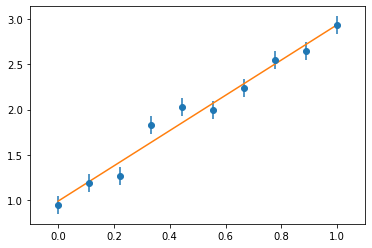

In [18]:
# get better parameter values
a_fit = m.values["a"]
b_fit = m.values["b"]

plt.errorbar(x, y, sigma_y, fmt="o")
plt.plot(x, line(x, a_fit, b_fit))
plt.xlim(-0.1, 1.1);

### Fit of model with flexible number of parameters

    Sometimes model has large or variable number of parameters
    Example: fit a polynomial of degree 2, 3, 4, ... ?
    iminuit has alternative interface which passes parameters as numpy array to score function



In [19]:
 def LSQ_numpy(par):  # par is numpy array here 
    ym = np.polyval(par, x)  # for len(par) == 2 this is a line
    return np.sum((y - ym) ** 2 / sigma_y ** 2)


In [20]:
# pass starting values and step sizes as numpy arrays
m = Minuit.from_array_func(LSQ_numpy, (5, 5), error=(0.1, 0.1), errordef=1)

# automatic parameter names are assigned x0, x1, ...
m.get_param_states()

------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
------------------------------------------------------------------------------------------
| 0 | x0   |   5.00    |   0.10    |            |            |         |         |       |
| 1 | x1   |   5.00    |   0.10    |            |            |         |         |       |
------------------------------------------------------------------------------------------

In [21]:
# can easily change number of fitted parameters and assign names
m = Minuit.from_array_func(LSQ_numpy, (2, 1, 3, 5), error=0.1,
                           name=("a", "b", "c", "d"), errordef=1)

m.get_param_states()

------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
------------------------------------------------------------------------------------------
| 0 | a    |   2.00    |   0.10    |            |            |         |         |       |
| 1 | b    |   1.00    |   0.10    |            |            |         |         |       |
| 2 | c    |   3.00    |   0.10    |            |            |         |         |       |
| 3 | d    |   5.00    |   0.10    |            |            |         |         |       |
------------------------------------------------------------------------------------------

In [22]:
# fit the thing
m.migrad()

------------------------------------------------------------------
| FCN = 9.033                   |      Ncalls=96 (96 total)      |
| EDM = 4.37E-13 (Goal: 0.0002) |            up = 1.0            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
------------------------------------------------------------------------------------------
| 0 | a    |    0.8    |    1.3    |            |            |         |         |       |
| 1 | b    |   -1.5    |    2.0    |            |            |         |         |       |
| 2 | c    |    2.7    |    0.8    |            |            |         |         |       |
| 3 | d    |   0.91    |   0.09    |            |            |         |         |       |
------------------------------------------------------------------------------------------

In [23]:
# can also use score function with scipy.optimize.minimize-like interface
from iminuit import minimize  # has same interface as scipy.optimize.minimize
minimize(LSQ_numpy, (5, 5, 5, 5))

      fun: 9.033192085977742
 hess_inv: array([[ 1.72052069, -2.58078004,  0.97920889, -0.05947462],
       [-2.58078004,  3.99542986, -1.59307405,  0.10762097],
       [ 0.97920889, -1.59307405,  0.69138171, -0.05716727],
       [-0.05947462,  0.10762097, -0.05716727,  0.00823772]])
  message: 'Optimization terminated successfully.'
   minuit: <iminuit._libiminuit.Minuit object at 0x7fc46950c050>
     nfev: 104
     njev: 0
  success: True
        x: array([ 0.7654755 , -1.50304927,  2.73544024,  0.91193726])

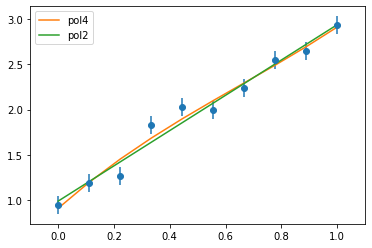

In [24]:
# get parameter values as arrays
par_fit = m.np_values()

plt.errorbar(x, y, sigma_y, fmt="o")
plt.plot(x, np.polyval(par_fit, x), label="pol4")
plt.plot(x, line(x, a_fit, b_fit), label="pol2")
plt.legend()
plt.xlim(-0.1, 1.1);



In [25]:
# check reduced chi2, goodness-of-fit estimate, should be around 1
m.fval / (len(y) - len(m.values))

1.5055320143296989

### Parameter uncertainties

* iminuit can compute symmetric uncertainty intervals ("Hesse errors")
     * automatically done during standard minimisation
     * to make sure you get accurate errors, call m.hesse() explicitly after m.migrad()
     * slow, computation time scales with 𝑁2par
* iminuit can also compute asymmetric uncertainty intervals ("Minos errors")
    * need to explicitly call m.minos()
    * very slow, computation time scales with 𝑁2par

### Covariance and correlation matrix from Hesse

In [26]:
# calling hesse explicitly
m.hesse()

------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
------------------------------------------------------------------------------------------
| 0 | a    |    0.8    |    1.3    |            |            |         |         |       |
| 1 | b    |   -1.5    |    2.0    |            |            |         |         |       |
| 2 | c    |    2.7    |    0.8    |            |            |         |         |       |
| 3 | d    |   0.91    |   0.09    |            |            |         |         |       |
------------------------------------------------------------------------------------------

In [27]:
# get full correlation matrix (automatically prints nicely in notebook)
m.matrix(correlation=True)

---------------------------
|   |    a    b    c    d |
---------------------------
| a |  1.0 -1.0  0.9 -0.5 |
| b | -1.0  1.0 -1.0  0.6 |
| c |  0.9 -1.0  1.0 -0.8 |
| d | -0.5  0.6 -0.8  1.0 |
---------------------------

In [28]:
# or get covariance matrix
m.matrix()

-----------------------------------
|   |      a      b      c      d |
-----------------------------------
| a |  1.721 -2.581  0.979 -0.059 |
| b | -2.581  3.995 -1.593  0.108 |
| c |  0.979 -1.593  0.691 -0.057 |
| d | -0.059  0.108 -0.057  0.008 |
-----------------------------------

In [29]:
# or get matrix as numpy array
m.np_matrix()

array([[ 1.72054192, -2.58081288,  0.979222  , -0.05947552],
       [-2.58081288,  3.99548068, -1.59309437,  0.10762237],
       [ 0.979222  , -1.59309437,  0.69138984, -0.05716783],
       [-0.05947552,  0.10762237, -0.05716783,  0.00823776]])

In [30]:
# access individual elements of matrices
corr = m.np_matrix(correlation=True)
print(corr[0, 1])
print(corr[0, 3])

-0.9843269379727133
-0.4995753625986588


### Asymmetric uncertainty intervals from Minos


In [31]:
m.minos()

-------------------------------------------------
|        a        |            Valid            |
-------------------------------------------------
|      Error      |     -1.3     |      1.3     |
|      Valid      |     True     |     True     |
|    At Limit     |    False     |    False     |
|     Max FCN     |    False     |    False     |
|     New Min     |    False     |    False     |
-------------------------------------------------
-------------------------------------------------
|        b        |            Valid            |
-------------------------------------------------
|      Error      |     -2.0     |      2.0     |
|      Valid      |     True     |     True     |
|    At Limit     |    False     |    False     |
|     Max FCN     |    False     |    False     |
|     New Min     |    False     |    False     |
-------------------------------------------------
-------------------------------------------------
|        c        |            Valid            |
-------------------------------------------------
|      Error      |     -0.8     |      0.8     |
|      Valid      |     True     |     True     |
|    At Limit     |    False     |    False     |
|     Max FCN     |    False     |    False     |
|     New Min     |    False     |    False     |
-------------------------------------------------
-------------------------------------------------
|        d        |            Valid            |
-------------------------------------------------
|      Error      |    -0.09     |     0.09     |
|      Valid      |     True     |     True     |
|    At Limit     |    False     |    False     |
|     Max FCN     |    False     |    False     |
|     New Min     |    False     |    False     |
-------------------------------------------------

* Minos can fail, check messages:
    * "Valid": everything is chipper
    * "At Limit": Minos hit parameter limit before finishing contour
    * "Max FCN": Minos reached call limit before finishing contour
    * "New Min": Minos found a new minimum while scanning


In [32]:
# Minos errors now appear in parameter table
m.get_param_states()

------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
------------------------------------------------------------------------------------------
| 0 | a    |    0.8    |    1.3    |    -1.3    |     1.3    |         |         |       |
| 1 | b    |   -1.5    |    2.0    |    -2.0    |     2.0    |         |         |       |
| 2 | c    |    2.7    |    0.8    |    -0.8    |     0.8    |         |         |       |
| 3 | d    |    0.91   |    0.09   |   -0.09    |    0.09    |         |         |       |
------------------------------------------------------------------------------------------

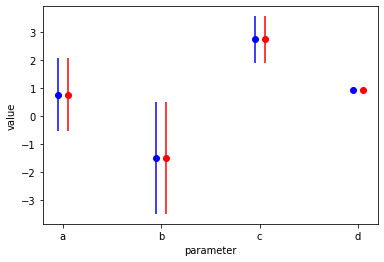

In [33]:
# plot parameters with errors
v = m.np_values()
ve = m.np_errors()
vm = m.np_merrors()

npar = len(v)
indices = np.arange(npar)

# plot hesse errors
plt.errorbar(indices - 0.05, v, ve, fmt="ob")

# plot minos errors
plt.errorbar(indices + 0.05, v, vm, fmt="or")

# make nice labels
plt.xticks(indices, m.values.keys())
plt.xlim(-0.2, indices[-1] + 0.2)
plt.xlabel("parameter")
plt.ylabel("value");

### Builtin plotting

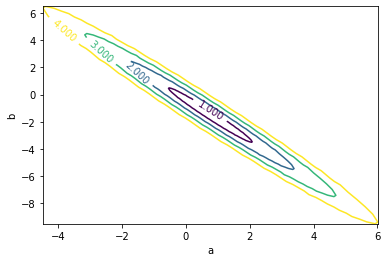

In [35]:
m.draw_mncontour('a','b', nsigma=4);  # nsigma=4 says: draw four contours from sigma=1 to 4

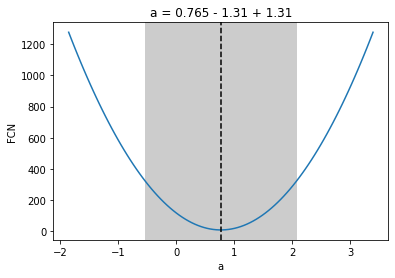

In [37]:
m.draw_profile("a");

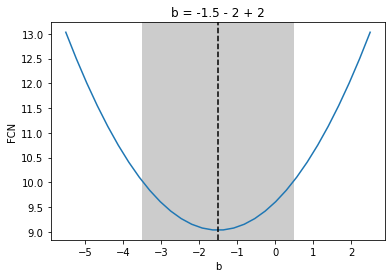

In [38]:
m.draw_mnprofile("b");

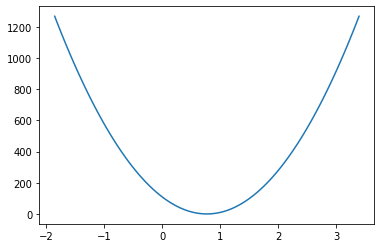

In [39]:
# get scan data to plot it yourself
px, py = m.profile('a', subtract_min=True)
plt.plot(px, py);

### kp: Putting things together


random.normal:  [-0.68491745 -0.81844985  0.02000103  0.34709338 -0.34475483 -1.13027344
 -0.4536522   0.41735629 -0.09653418  0.80614515]
Fit Parameter Results:  [0.9335147010477738, 2.094210875988344]
x(Min, Max):  0.0 1.0


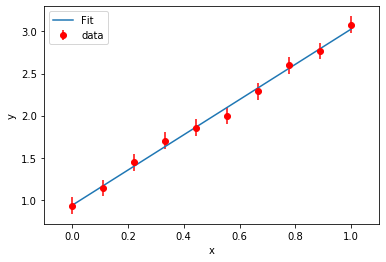

In [63]:
# basic setup of the notebook
from matplotlib import pyplot as plt
import pandas as pd 
import numpy as np
from pprint import pprint # we use this to pretty print some stuff later
# everything in iminuit is done through the Minuit object, so we import it
from iminuit import Minuit
import math

a_true = 1.0 # y-intercept
b_true = 2.0 # Slope 

######## First generating the X, Y and Y-error values as ndarrays #############
# let's make some data by arbitrarily choosing 10 x-values from 0 to 1
x = np.linspace(0, 1, 10)

# precomputed random numbers from standard normal distribution
#z = np.array([-0.49783783, -0.33041722, -1.71800806, 1.60229399,1.36682387, 
#              -1.15424221, -0.91425267, -0.03395604, -1.27611719, -0.7004073])
z = np.random.normal(0.0, 1.0, 10) #kp: Mean, Sigma, total random numbers to be generated
print("random.normal: ", z)

#https://appdividend.com/2020/03/23/python-numpy-ones_like-function-example/
#Numpy ones_like() function contains four parameters and is used to return an array of 
# the similar shape and size with values of elements of array replaced with ones.
sigma_y = 0.1 * np.ones_like(x)          #kp: 10% of values as errors?
y = line(x, a_true, b_true) + sigma_y * z





### Now make a dataframe of the generated dataset and return it
## First creating a 2D array out of the 1D numpy arrays
#https://stackoverflow.com/questions/17710672/create-2-dimensional-array-with-2-one-dimensional-array
#combined = np.vstack((tp, fp)).T
combined = np.vstack((x,y,sigma_y)).T
columnNames = ['x', 'y', 'yError'] 

df = pd.DataFrame(data = combined, columns = columnNames)#,index = index_values) 

    
######## Next plotting those data points ############
#plt.errorbar(x, y, sigma_y, fmt="o")
#plt.xlim(-0.1, 1.1);

#Following use of new variables is for the purpose of
#    Testing if it works with dataframe retreival too
#X, Y, sigma_Y = x, y, sigma_y  #Using re-assignment to get X, Y, sigma_Y
X, Y, sigma_Y = df['x'].to_numpy(), df['y'].to_numpy(), df['yError'].to_numpy()


#### Defining the function (fcn) to be passed to iMinuit #######
#    chiSq = sum of squares of the residuals/differences
#            between the measured/known and calculated (based 
#            on fit-pars) values of alpha_p.
#
def fcnChiSq(par): #par represent the nd-array of weights
    chiSq = 0.0
    for i in range(X.size):
        ix      = X[i]
        iy      = Y[i] #This now 1D ndarray
        iyErr   = sigma_Y[i]
            
        yCalc = par[0] + par[1]*ix  #straightLine(x, par)
        if iyErr > 0.0:
            chiSq = chiSq + ((iy - yCalc)/iyErr)**2

    return chiSq


par = np.array([0.1 for i in range(2)])  #par initialization
errors = np.array([0.1*x for x in par])  #erros (arbitrary)

#m = Minuit(fcn, par, pedantic=False)  # silence warnings, use default values
#m = Minuit.from_array_func(fcn, par, pedantic=False)  # silence warnings, use default values
m = Minuit.from_array_func(fcnChiSq, par, error=errors, errordef=1)  # silence warnings, use default values
m.migrad()
#m.hesse()  # computes errors 
#m.get_param_states()

    
    
### Minimization is done, now retreiving and printing pars 
fitPars = m.values.values()
print('Fit Parameter Results: ', fitPars)


######## Next plotting those data points & the fit ############
xMin, xMax = x.min(), x.max()
print('x(Min, Max): ', xMin,xMax)

nPoints4FitLine = 20
xf = np.linspace(xMin,xMax,nPoints4FitLine)
yf = [(fitPars[0] + fitPars[1]*ix) for ix in xf]

plt.errorbar(x, y, sigma_y, fmt="o", label='data', color='red', linestyle='')

#plt.plot(dff[['LETd_HP']], dff[['alpha']],label='LETd (All)', 
#     marker='^', color='red', linestyle='')#, linestyle=':') 
plt.plot(xf,yf, label="Fit")

plt.legend()
plt.ylabel('y')
plt.xlabel('x')
#print("let Min & Max: ", letMin, letMax)
#xMin, xMax = letMin - 0.05*abs(letMin), letMax + 0.05*abs(letMin)
xMin = 0.0
#plt.xlim(xMin, xMax)
plt.xlim(-0.1, 1.1);
plt.show()
